In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pymc as pm
import arviz as az
import numpy as np

# Cleaning Files

### Economic activity by country of birth by age

In [2]:
 eco_cntByBirth_age_df = pd.read_csv("Data/2011/Economic activity by country of birth by age.csv")

In [3]:
eco_cntByBirth_age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Columns: 744 entries, date to Age: Age 50 and over; Economic Activity: Economically inactive: Other; Country of Birth: Antarctica, Oceania (including Australasia) and other; measures: Value
dtypes: int64(742), object(2)
memory usage: 2.0+ MB


In [4]:
eco_cntByBirth_age_df

,date,geography,geography code,Age: All categories: Age 16 and over; Economic Activity: All categories: Economic activity; Country of Birth: All categories: Country of birth; measures: Value,Age: All categories: Age 16 and over; Economic Activity: All categories: Economic activity; Country of Birth: Europe: Total; measures: Value,Age: All categories: Age 16 and over; Economic Activity: All categories: Economic activity; Country of Birth: Europe: United Kingdom; measures: Value,Age: All categories: Age 16 and over; Economic Activity: All categories: Economic activity; Country of Birth: Europe: Ireland; measures: Value,Age: All categories: Age 16 and over; Economic Activity: All categories: Economic activity; Country of Birth: Europe: Other Europe: Total; measures: Value,Age: All categories: Age 16 and over; Economic Activity: All categories: Economic activity; Country of Birth: Europe: Other Europe: EU countries: Total; measures: Value,Age: All categories: Age 16 and over; Economic Activity: All categories: Economic activity; Country of Birth: Europe: Other Europe: EU countries: Member countries in March 2001; measures: Value,...,Age: Age 50 and over; Economic Activity: Economically inactive: Other; Country of Birth: Europe: Ireland; measures: Value,Age: Age 50 and over; Economic Activity: Economically inactive: Other; Country of Birth: Europe: Other Europe: Total; measures: Value,Age: Age 50 and over; Economic Activity: Economically inactive: Other; Country of Birth: Europe: Other Europe: EU countries: Total; measures: Value,Age: Age 50 and over; Economic Activity: Economically inactive: Other; Country of Birth: Europe: Other Europe: EU countries: Member countries in March 2001; measures: Value,Age: Age 50 and over; Economic Activity: Economically inactive: Other; Country of Birth: Europe: Other Europe: EU countries: Accession countries April 2001 to March 2011; measures: Value,Age: Age 50 and over; Economic Activity: Economically inactive: Other; Country of Birth: Europe: Other Europe: Rest of Europe; measures: Value,Age: Age 50 and over; Economic Activity: Economically inactive: Other; Country of Birth: Africa; measures: Value,Age: Age 50 and over; Economic Activity: Economically inactive: Other; Country of Birth: Middle East and Asia; measures: Value,Age: Age 50 and over; Economic Activity: Economically inactive: Other; Country of Birth: The Americas and the Caribbean; measures: Value,"Age: Age 50 and over; Economic Activity: Economically inactive: Other; Country of Birth: Antarctica, Oceania (including Australasia) and other; measures: Value"
0,2011,Darlington,E06000005,85357,82957,80454,248,2255,2129,961,...,3,16,15,8,7,1,2,17,1,0
1,2011,County Durham,E06000047,425258,417556,410017,870,6669,6001,3467,...,18,31,29,21,8,2,11,19,11,3
2,2011,Hartlepool,E06000001,74228,72924,71963,144,817,759,349,...,0,3,3,2,1,0,0,21,2,0
3,2011,Middlesbrough,E06000002,110409,102809,100165,427,2217,1967,857,...,6,12,11,6,5,1,10,114,2,0
4,2011,Northumberland,E06000057,262162,257958,254073,579,3306,2976,1835,...,7,29,24,22,2,5,2,27,16,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2011,Caerphilly,W06000018,143825,141994,139953,344,1697,1527,903,...,11,15,13,8,5,2,1,8,4,0
344,2011,Blaenau Gwent,W06000019,57321,56740,55970,90,680,600,236,...,1,3,3,3,0,0,0,5,1,0
345,2011,Torfaen,W06000020,73833,72576,71576,284,716,610,423,...,5,8,8,7,1,0,3,6,2,1
346,2011,Monmouthshire,W06000021,75080,73193,71430,323,1440,1288,835,...,6,11,11,7,4,0,3,6,7,0


In [5]:
eco_cntByBirth_age_df.describe()

,date,Age: All categories: Age 16 and over; Economic Activity: All categories: Economic activity; Country of Birth: All categories: Country of birth; measures: Value,Age: All categories: Age 16 and over; Economic Activity: All categories: Economic activity; Country of Birth: Europe: Total; measures: Value,Age: All categories: Age 16 and over; Economic Activity: All categories: Economic activity; Country of Birth: Europe: United Kingdom; measures: Value,Age: All categories: Age 16 and over; Economic Activity: All categories: Economic activity; Country of Birth: Europe: Ireland; measures: Value,Age: All categories: Age 16 and over; Economic Activity: All categories: Economic activity; Country of Birth: Europe: Other Europe: Total; measures: Value,Age: All categories: Age 16 and over; Economic Activity: All categories: Economic activity; Country of Birth: Europe: Other Europe: EU countries: Total; measures: Value,Age: All categories: Age 16 and over; Economic Activity: All categories: Economic activity; Country of Birth: Europe: Other Europe: EU countries: Member countries in March 2001; measures: Value,Age: All categories: Age 16 and over; Economic Activity: All categories: Economic activity; Country of Birth: Europe: Other Europe: EU countries: Accession countries April 2001 to March 2011; measures: Value,Age: All categories: Age 16 and over; Economic Activity: All categories: Economic activity; Country of Birth: Europe: Other Europe: Rest of Europe; measures: Value,...,Age: Age 50 and over; Economic Activity: Economically inactive: Other; Country of Birth: Europe: Ireland; measures: Value,Age: Age 50 and over; Economic Activity: Economically inactive: Other; Country of Birth: Europe: Other Europe: Total; measures: Value,Age: Age 50 and over; Economic Activity: Economically inactive: Other; Country of Birth: Europe: Other Europe: EU countries: Total; measures: Value,Age: Age 50 and over; Economic Activity: Economically inactive: Other; Country of Birth: Europe: Other Europe: EU countries: Member countries in March 2001; measures: Value,Age: Age 50 and over; Economic Activity: Economically inactive: Other; Country of Birth: Europe: Other Europe: EU countries: Accession countries April 2001 to March 2011; measures: Value,Age: Age 50 and over; Economic Activity: Economically inactive: Other; Country of Birth: Europe: Other Europe: Rest of Europe; measures: Value,Age: Age 50 and over; Economic Activity: Economically inactive: Other; Country of Birth: Africa; measures: Value,Age: Age 50 and over; Economic Activity: Economically inactive: Other; Country of Birth: Middle East and Asia; measures: Value,Age: Age 50 and over; Economic Activity: Economically inactive: Other; Country of Birth: The Americas and the Caribbean; measures: Value,"Age: Age 50 and over; Economic Activity: Economically inactive: Other; Country of Birth: Antarctica, Oceania (including Australasia) and other; measures: Value"
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,...,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2011.0,130737.873563,118043.028736,110879.841954,1144.540230,6018.646552,5206.614943,2337.362069,2869.252874,812.031609,...,18.945402,40.218391,31.034483,17.267241,13.767241,9.183908,38.482759,116.468391,23.959770,2.155172
std,0.0,87133.733518,74569.772105,70986.090555,1527.709821,7708.611984,6296.534706,3126.566535,3841.594709,1657.533613,...,33.002051,76.667090,48.991371,26.486588,29.305808,32.791465,89.613723,282.403367,57.798154,3.510224
min,2011.0,1857.000000,1797.000000,1733.000000,8.000000,56.000000,53.000000,17.000000,36.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.0,77283.250000,73026.500000,70579.500000,407.500000,1870.750000,1672.750000,834.500000,779.500000,181.000000,...,5.000000,11.000000,9.000000,6.000000,3.000000,1.000000,4.000000

In [6]:
id_vars = ["date", "geography", "geography code"]
eco_cntByBirth_age_df = eco_cntByBirth_age_df.melt(id_vars=id_vars, var_name="Attribute", value_name="Value")

# Splitting the "Attribute" column into multiple meaningful features
eco_cntByBirth_age_df[['Age Group', 'Economic Activity', 'Country of Birth', 'Measure']] = eco_cntByBirth_age_df['Attribute'].str.split('; ', expand=True)

# Drop the original "Attribute" column
eco_cntByBirth_age_df.drop(columns=["Attribute"], inplace=True)

# Display the transformed data
print(eco_cntByBirth_age_df.head())

   date       geography geography code   Value  \
0  2011      Darlington      E06000005   85357   
1  2011   County Durham      E06000047  425258   
2  2011      Hartlepool      E06000001   74228   
3  2011   Middlesbrough      E06000002  110409   
4  2011  Northumberland      E06000057  262162   

                              Age Group  \
0  Age: All categories: Age 16 and over   
1  Age: All categories: Age 16 and over   
2  Age: All categories: Age 16 and over   
3  Age: All categories: Age 16 and over   
4  Age: All categories: Age 16 and over   

                                   Economic Activity  \
0  Economic Activity: All categories: Economic ac...   
1  Economic Activity: All categories: Economic ac...   
2  Economic Activity: All categories: Economic ac...   
3  Economic Activity: All categories: Economic ac...   
4  Economic Activity: All categories: Economic ac...   

                                    Country of Birth          Measure  
0  Country of Birth: All catego

In [7]:
eco_cntByBirth_age_df['Age Group'] = eco_cntByBirth_age_df['Age Group'].str.replace('Age: ', '', regex=False)
eco_cntByBirth_age_df['Economic Activity'] = eco_cntByBirth_age_df['Economic Activity'].str.replace('Economic Activity: ', '', regex=False)
eco_cntByBirth_age_df['Country of Birth'] = eco_cntByBirth_age_df['Country of Birth'].str.replace('Country of Birth: ', '', regex=False)
eco_cntByBirth_age_df['Measure'] = eco_cntByBirth_age_df['Measure'].str.replace('measures: ', '', regex=False)

In [8]:
eco_cntByBirth_age_df['Value'] = pd.to_numeric(eco_cntByBirth_age_df['Value'])

In [9]:
missing_values_summary = eco_cntByBirth_age_df.isnull().sum()
print("\nMissing Values Summary:\n", missing_values_summary)


Missing Values Summary:
 date                 0
geography            0
geography code       0
Value                0
Age Group            0
Economic Activity    0
Country of Birth     0
Measure              0
dtype: int64


In [10]:
eco_cntByBirth_age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257868 entries, 0 to 257867
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   date               257868 non-null  int64 
 1   geography          257868 non-null  object
 2   geography code     257868 non-null  object
 3   Value              257868 non-null  int64 
 4   Age Group          257868 non-null  object
 5   Economic Activity  257868 non-null  object
 6   Country of Birth   257868 non-null  object
 7   Measure            257868 non-null  object
dtypes: int64(2), object(6)
memory usage: 15.7+ MB


In [11]:
eco_cntByBirth_age_df = eco_cntByBirth_age_df[~eco_cntByBirth_age_df["Age Group"].str.lower().str.contains("total|all categories")]
eco_cntByBirth_age_df = eco_cntByBirth_age_df[~eco_cntByBirth_age_df["Economic Activity"].str.lower().str.contains("total|all categories")]
eco_cntByBirth_age_df = eco_cntByBirth_age_df[~eco_cntByBirth_age_df["Country of Birth"].str.lower().str.contains("total|all categories")]

In [12]:
eco_cntByBirth_age_df.drop(columns=["Measure"], inplace=True)

In [13]:
eco_cntByBirth_age_df

,date,geography,geography code,Value,Age Group,Economic Activity,Country of Birth
104748,2011,Darlington,E06000005,7288,Age 16 to 49,Economically active: In employment: Employee: ...,Europe: United Kingdom
104749,2011,County Durham,E06000047,32286,Age 16 to 49,Economically active: In employment: Employee: ...,Europe: United Kingdom
104750,2011,Hartlepool,E06000001,6735,Age 16 to 49,Economically active: In employment: Employee: ...,Europe: United Kingdom
104751,2011,Middlesbrough,E06000002,9642,Age 16 to 49,Economically active: In employment: Employee: ...,Europe: United Kingdom
104752,2011,Northumberland,E06000057,21070,Age 16 to 49,Economically active: In employment: Employee: ...,Europe: United Kingdom
...,...,...,...,...,...,...,...
257863,2011,Caerphilly,W06000018,0,Age 50 and over,Economically inactive: Other,"Antarctica, Oceania (including Australasia) an..."
257864,2011,Blaenau Gwent,W06000019,0,Age 50 and over,Economically inactive: Other,"Antarctica, Oceania (including Australasia) an..."
257865,2011,Torfaen,W06000020,1,Age 50 and over,Economically inactive: Other,"Antarctica, Oceania (including Australasia) an..."
257866,2011,Monmouthshire,W06000021,0,Age 50 and over,Economically inactive: Other,"Antarctica, Oceania (including Australasia) an..."


In [14]:
output_path = "Cleaned data/Cleaned_Economic_Activity_by_Country_of_Birth_by_Age.csv"
eco_cntByBirth_age_df.to_csv(output_path, index=False)

print(f"Cleaned data has been saved to: {output_path}")

Cleaned data has been saved to: Cleaned data/Cleaned_Economic_Activity_by_Country_of_Birth_by_Age.csv


### Highest level of qualification by year of arrival in the UK by country of birth by age

In [15]:
highQual_by_Arrival_by_Conuntry_of_Birth_df = pd.read_csv("Data/2011/Highest level of qualification by year of arrival in the UK by country of birth by age.csv")

In [16]:
highQual_by_Arrival_by_Conuntry_of_Birth_df

,date,Geography: England and Wales (K04000001); Age: All categories: Age 16 and over; Qualification: All categories: Highest level of qualification; Year of Arrival in UK: All categories: All usual residents aged 16 and over; Country of Birth: All categories: Country of birth; measures: Value,Geography: England and Wales (K04000001); Age: All categories: Age 16 and over; Qualification: All categories: Highest level of qualification; Year of Arrival in UK: All categories: All usual residents aged 16 and over; Country of Birth: Europe: Total; measures: Value,Geography: England and Wales (K04000001); Age: All categories: Age 16 and over; Qualification: All categories: Highest level of qualification; Year of Arrival in UK: All categories: All usual residents aged 16 and over; Country of Birth: Europe: United Kingdom; measures: Value,Geography: England and Wales (K04000001); Age: All categories: Age 16 and over; Qualification: All categories: Highest level of qualification; Year of Arrival in UK: All categories: All usual residents aged 16 and over; Country of Birth: Europe: Ireland; measures: Value,Geography: England and Wales (K04000001); Age: All categories: Age 16 and over; Qualification: All categories: Highest level of qualification; Year of Arrival in UK: All categories: All usual residents aged 16 and over; Country of Birth: Europe: Other Europe: Total; measures: Value,Geography: England and Wales (K04000001); Age: All categories: Age 16 and over; Qualification: All categories: Highest level of qualification; Year of Arrival in UK: All categories: All usual residents aged 16 and over; Country of Birth: Europe: Other Europe: EU countries: Total; measures: Value,Geography: England and Wales (K04000001); Age: All categories: Age 16 and over; Qualification: All categories: Highest level of qualification; Year of Arrival in UK: All categories: All usual residents aged 16 and over; Country of Birth: Europe: Other Europe: EU countries: Member countries in March 2001: Total; measures: Value,Geography: England and Wales (K04000001); Age: All categories: Age 16 and over; Qualification: All categories: Highest level of qualification; Year of Arrival in UK: All categories: All usual residents aged 16 and over; Country of Birth: Europe: Other Europe: EU countries: Member countries in March 2001: France; measures: Value,Geography: England and Wales (K04000001); Age: All categories: Age 16 and over; Qualification: All categories: Highest level of qualification; Year of Arrival in UK: All categories: All usual residents aged 16 and over; Country of Birth: Europe: Other Europe: EU countries: Member countries in March 2001: Germany; measures: Value,...,Geography: England and Wales (K04000001); Age: Age 65 and over; Qualification: Highest level of qualification: Other qualifications; Year of Arrival in UK: Arrived 2001-2011; Country of Birth: Middle East and Asia: Bangladesh; measures: Value,Geography: England and Wales (K04000001); Age: Age 65 and over; Qualification: Highest level of qualification: Other qualifications; Year of Arrival in UK: Arrived 2001-2011; Country of Birth: Middle East and Asia: India; measures: Value,Geography: England and Wales (K04000001); Age: Age 65 and over; Qualification: Highest level of qualification: Other qualifications; Year of Arrival in UK: Arrived 2001-2011; Country of Birth: Middle East and Asia: Pakistan; measures: Value,Geography: England and Wales (K04000001); Age: Age 65 and over; Qualification: Highest level of qualification: Other qualifications; Year of Arrival in UK: Arrived 2001-2011; Country of Birth: Middle East and Asia: Other; measures: Value,Geography: England and Wales (K04000001); Age: Age 65 and over; Qualification: Highest level of qualification: Other qualifications; Year of Arrival in UK: Arrived 2001-2011; Country of Birth: The Americas and the Caribbean: Total; measures: Value,Geography: England and Wales (K04000001); Age: Age 65 and over; Qualification: Highest level of qualificat

In [17]:
id_vars = ["date"]

In [18]:
df_melted = highQual_by_Arrival_by_Conuntry_of_Birth_df.melt(id_vars=id_vars, var_name="Attribute", value_name="Value")

In [19]:
df_melted[['Geography', 'Age', 'Qualification', 'Year of Arrival', 'Country of Birth', 'Measure']] = df_melted['Attribute'].str.split('; ', expand=True)

df_melted.drop(columns=["Attribute"], inplace=True)


In [20]:
df_melted

,date,Value,Geography,Age,Qualification,Year of Arrival,Country of Birth,Measure
0,2011,45496780,Geography: England and Wales (K04000001),Age: All categories: Age 16 and over,Qualification: All categories: Highest level o...,Year of Arrival in UK: All categories: All usu...,Country of Birth: All categories: Country of b...,measures: Value
1,2011,41078974,Geography: England and Wales (K04000001),Age: All categories: Age 16 and over,Qualification: All categories: Highest level o...,Year of Arrival in UK: All categories: All usu...,Country of Birth: Europe: Total,measures: Value
2,2011,38586185,Geography: England and Wales (K04000001),Age: All categories: Age 16 and over,Qualification: All categories: Highest level o...,Year of Arrival in UK: All categories: All usu...,Country of Birth: Europe: United Kingdom,measures: Value
3,2011,398300,Geography: England and Wales (K04000001),Age: All categories: Age 16 and over,Qualification: All categories: Highest level o...,Year of Arrival in UK: All categories: All usu...,Country of Birth: Europe: Ireland,measures: Value
4,2011,2094489,Geography: England and Wales (K04000001),Age: All categories: Age 16 and over,Qualification: All categories: Highest level o...,Year of Arrival in UK: All categories: All usu...,Country of Birth: Europe: Other Europe: Total,measures: Value
...,...,...,...,...,...,...,...,...
6715,2011,50,Geography: England and Wales (K04000001),Age: Age 65 and over,Qualification: Highest level of qualification:...,Year of Arrival in UK: Arrived 2001-2011,Country of Birth: The Americas and the Caribbe...,measures: Value
6716,2011,291,Geography: England and Wales (K04000001),Age: Age 65 and over,Qualification: Highest level of qualification:...,Year of Arrival in UK: Arrived 2001-2011,Country of Birth: The Americas and the Caribbe...,measures: Value
6717,2011,139,Geography: England and Wales (K04000001),Age: Age 65 and over,Qualification: Highest level of qualification:...,Year of Arrival in UK: Arrived 2001-2011,Country of Birth: The Americas and the Caribbe...,measures: Value
6718,2011,378,Geography: England and Wales (K04000001),Age: Age 65 and over,Qualification: Highest level of qualification:...,Year of Arrival in UK: Arrived 2001-2011,Country of Birth: The Americas and the Caribbe...,measures: Value


In [21]:
df_melted['Geography'] = df_melted['Geography'].str.replace('Geography: ', '', regex=False)
df_melted['Age'] = df_melted['Age'].str.replace('Age: ', '', regex=False)
df_melted['Qualification'] = df_melted['Qualification'].str.replace('Qualification: ', '', regex=False)
df_melted['Year of Arrival'] = df_melted['Year of Arrival'].str.replace('Year of Arrival in UK: ', '', regex=False)
df_melted['Country of Birth'] = df_melted['Country of Birth'].str.replace('Country of Birth: ', '', regex=False)

In [22]:
df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')

In [23]:
df_melted.drop(columns=["Measure"], inplace=True)

In [24]:
missing_values_summary = df_melted.isnull().sum()
print("\nMissing Values Summary:\n", missing_values_summary)


Missing Values Summary:
 date                0
Value               0
Geography           0
Age                 0
Qualification       0
Year of Arrival     0
Country of Birth    0
dtype: int64


In [25]:
df_melted = df_melted[~df_melted["Qualification"].str.lower().str.contains("total|all categories")]
df_melted = df_melted[~df_melted["Year of Arrival"].str.lower().str.contains("total|all categories")]
df_melted = df_melted[~df_melted["Age"].str.lower().str.contains("total|all categories")]
df_melted = df_melted[~df_melted["Country of Birth"].str.lower().str.contains("total|all categories")]

In [26]:
df_melted

,date,Value,Geography,Age,Qualification,Year of Arrival,Country of Birth
1602,2011,612399,England and Wales (K04000001),Age 16 to 24,No qualifications,Born in the UK,Europe: United Kingdom
1603,2011,0,England and Wales (K04000001),Age 16 to 24,No qualifications,Born in the UK,Europe: Ireland
1607,2011,0,England and Wales (K04000001),Age 16 to 24,No qualifications,Born in the UK,Europe: Other Europe: EU countries: Member cou...
1608,2011,0,England and Wales (K04000001),Age 16 to 24,No qualifications,Born in the UK,Europe: Other Europe: EU countries: Member cou...
1609,2011,0,England and Wales (K04000001),Age 16 to 24,No qualifications,Born in the UK,Europe: Other Europe: EU countries: Member cou...
...,...,...,...,...,...,...,...
6715,2011,50,England and Wales (K04000001),Age 65 and over,Highest level of qualification: Other qualific...,Arrived 2001-2011,The Americas and the Caribbean: Canada
6716,2011,291,England and Wales (K04000001),Age 65 and over,Highest level of qualification: Other qualific...,Arrived 2001-2011,The Americas and the Caribbean: United States
6717,2011,139,England and Wales (K04000001),Age 65 and over,Highest level of qualification: Other qualific...,Arrived 2001-2011,The Americas and the Caribbean: Jamaica
6718,2011,378,England and Wales (K04000001),Age 65 and over,Highest level of qualification: Other qualific...,Arrived 2001-2011,The Americas and the Caribbean: Other


In [27]:
output_path = "Cleaned data/Cleaned_Highest_Level_of_Qualification_by_Year_of_Arrival_in_the_UK_by_Country_of_Birth_by_Age.csv"
df_melted.to_csv(output_path, index=False)

print(f"Cleaned data has been saved to: {output_path}")

Cleaned data has been saved to: Cleaned data/Cleaned_Highest_Level_of_Qualification_by_Year_of_Arrival_in_the_UK_by_Country_of_Birth_by_Age.csv


### Occupation by year of arrival in the UK by country of birth

In [28]:
Occup_by_Year_of_Arrival_by_Country_of_Birth_df = pd.read_csv("Data/2011/Occupation by year of arrival in the UK by country of birth.csv")

In [29]:
id_vars = ["date" ]
df_melted = Occup_by_Year_of_Arrival_by_Country_of_Birth_df.melt(id_vars=id_vars, var_name="Attribute", value_name="Value")

In [30]:
Occup_by_Year_of_Arrival_by_Country_of_Birth_df

,date,Geography: England and Wales (K04000001); Occupation: All categories: Occupation; Year of Arrival in UK: All categories: All usual residents aged 16 and over; Country of Birth: All categories: Country of birth; measures: Value,Geography: England and Wales (K04000001); Occupation: All categories: Occupation; Year of Arrival in UK: All categories: All usual residents aged 16 and over; Country of Birth: Europe: Total; measures: Value,Geography: England and Wales (K04000001); Occupation: All categories: Occupation; Year of Arrival in UK: All categories: All usual residents aged 16 and over; Country of Birth: Europe: United Kingdom; measures: Value,Geography: England and Wales (K04000001); Occupation: All categories: Occupation; Year of Arrival in UK: All categories: All usual residents aged 16 and over; Country of Birth: Europe: Ireland; measures: Value,Geography: England and Wales (K04000001); Occupation: All categories: Occupation; Year of Arrival in UK: All categories: All usual residents aged 16 and over; Country of Birth: Europe: Other Europe: Total; measures: Value,Geography: England and Wales (K04000001); Occupation: All categories: Occupation; Year of Arrival in UK: All categories: All usual residents aged 16 and over; Country of Birth: Europe: Other Europe: EU countries: Total; measures: Value,Geography: England and Wales (K04000001); Occupation: All categories: Occupation; Year of Arrival in UK: All categories: All usual residents aged 16 and over; Country of Birth: Europe: Other Europe: EU countries: Member countries in March 2001: Total; measures: Value,Geography: England and Wales (K04000001); Occupation: All categories: Occupation; Year of Arrival in UK: All categories: All usual residents aged 16 and over; Country of Birth: Europe: Other Europe: EU countries: Member countries in March 2001: France; measures: Value,Geography: England and Wales (K04000001); Occupation: All categories: Occupation; Year of Arrival in UK: All categories: All usual residents aged 16 and over; Country of Birth: Europe: Other Europe: EU countries: Member countries in March 2001: Germany; measures: Value,...,Geography: England and Wales (K04000001); Occupation: 9. Elementary occupations; Year of Arrival in UK: Arrived 2001-2011; Country of Birth: Middle East and Asia: Bangladesh; measures: Value,Geography: England and Wales (K04000001); Occupation: 9. Elementary occupations; Year of Arrival in UK: Arrived 2001-2011; Country of Birth: Middle East and Asia: India; measures: Value,Geography: England and Wales (K04000001); Occupation: 9. Elementary occupations; Year of Arrival in UK: Arrived 2001-2011; Country of Birth: Middle East and Asia: Pakistan; measures: Value,Geography: England and Wales (K04000001); Occupation: 9. Elementary occupations; Year of Arrival in UK: Arrived 2001-2011; Country of Birth: Middle East and Asia: Other; measures: Value,Geography: England and Wales (K04000001); Occupation: 9. Elementary occupations; Year of Arrival in UK: Arrived 2001-2011; Country of Birth: The Americas and the Caribbean: Total; measures: Value,Geography: England and Wales (K04000001); Occupation: 9. Elementary occupations; Year of Arrival in UK: Arrived 2001-2011; Country of Birth: The Americas and the Caribbean: Canada; measures: Value,Geography: England and Wales (K04000001); Occupation: 9. Elementary occupations; Year of Arrival in UK: Arrived 2001-2011; Country of Birth: The Americas and the Caribbean: United States; measures: Value,Geography: England and Wales (K04000001); Occupation: 9. Elementary occupations; Year of Arrival in UK: Arrived 2001-2011; Country of Birth: The Americas and the Caribbean: Jamaica; measures: Value,Geography: England and Wales (K04000001); Occupation: 9. Elementary occupations; Year of Arrival in UK: Arrived 2001-2011; Country of Birth: The Americas and the Caribbean: Other; measures: Value,"Geography: England and Wales (K04000001); Occupation: 9. Elementary occupations; Year of Arrival in UK: Arrived 2001-20

In [31]:
split_columns = df_melted["Attribute"].str.split("; ", expand=True)
num_cols = split_columns.shape[1]

In [32]:
df_melted[['Geography', 'Occupation', 'Year of Arrival', 'Country of Birth', 'Measure']] = split_columns

In [33]:
df_melted.drop(columns=["Attribute"], inplace=True)

In [34]:
df_melted = df_melted.replace({
    'Geography: ': '',
    'Occupation: ': '',
    'Year of Arrival in UK: ': '',
    'Country of Birth: ': '',
    'measures: ': ''
}, regex=True)


In [35]:
df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')

In [36]:
missing_values_summary = df_melted.isnull().sum()
print("\nMissing Values Summary:\n", missing_values_summary)


Missing Values Summary:
 date                0
Value               0
Geography           0
Occupation          0
Year of Arrival     0
Country of Birth    0
Measure             0
dtype: int64


In [37]:
df_melted

,date,Value,Geography,Occupation,Year of Arrival,Country of Birth,Measure
0,2011,26681568,England and Wales (K04000001),All categories: Occupation,All categories: All usual residents aged 16 an...,All categories: Country of birth,Value
1,2011,24165854,England and Wales (K04000001),All categories: Occupation,All categories: All usual residents aged 16 an...,Europe: Total,Value
2,2011,22558112,England and Wales (K04000001),All categories: Occupation,All categories: All usual residents aged 16 an...,Europe: United Kingdom,Value
3,2011,176017,England and Wales (K04000001),All categories: Occupation,All categories: All usual residents aged 16 an...,Europe: Ireland,Value
4,2011,1431725,England and Wales (K04000001),All categories: Occupation,All categories: All usual residents aged 16 an...,Europe: Other Europe: Total,Value
...,...,...,...,...,...,...,...
2235,2011,678,England and Wales (K04000001),9. Elementary occupations,Arrived 2001-2011,The Americas and the Caribbean: Canada,Value
2236,2011,2061,England and Wales (K04000001),9. Elementary occupations,Arrived 2001-2011,The Americas and the Caribbean: United States,Value
2237,2011,2965,England and Wales (K04000001),9. Elementary occupations,Arrived 2001-2011,The Americas and the Caribbean: Jamaica,Value
2238,2011,14961,England and Wales (K04000001),9. Elementary occupations,Arrived 2001-2011,The Americas and the Caribbean: Other,Value


In [38]:
df_melted = df_melted[~df_melted["Year of Arrival"].str.lower().str.contains("total|all categories")]
df_melted = df_melted[~df_melted["Country of Birth"].str.lower().str.contains("total|all categories")]
df_melted = df_melted[~df_melted["Occupation"].str.lower().str.contains("total|all categories")]

In [39]:
df_melted.drop(columns=["Measure"], inplace=True)

In [40]:
output_path = "Cleaned data/Cleaned_Occupation_by_Year_of_Arrival_in_the_UK_by_Country_of_Birth.csv"
df_melted.to_csv(output_path, index=False)

print(f"Cleaned data has been saved to: {output_path}")

Cleaned data has been saved to: Cleaned data/Cleaned_Occupation_by_Year_of_Arrival_in_the_UK_by_Country_of_Birth.csv


### Occupation by highest level of qualification by age

In [41]:
Occup_by_Qualification_by_Age_df = pd.read_csv("Data/2011/Occupation by highest level of qualification by age.csv")

In [42]:
Occup_by_Qualification_by_Age_df

,date,geography,geography code,Age: All categories: Age 16 to 64; Occupation: All categories: Occupation; Highest Level of Qualification: All categories: Highest level of qualification; measures: Value,Age: All categories: Age 16 to 64; Occupation: All categories: Occupation; Highest Level of Qualification: No qualifications; measures: Value,Age: All categories: Age 16 to 64; Occupation: All categories: Occupation; Highest Level of Qualification: Level 1 qualifications; measures: Value,Age: All categories: Age 16 to 64; Occupation: All categories: Occupation; Highest Level of Qualification: Level 2 qualifications; measures: Value,Age: All categories: Age 16 to 64; Occupation: All categories: Occupation; Highest Level of Qualification: Level 3 qualifications; measures: Value,Age: All categories: Age 16 to 64; Occupation: All categories: Occupation; Highest Level of Qualification: Level 4 qualifications and above; measures: Value,Age: All categories: Age 16 to 64; Occupation: All categories: Occupation; Highest Level of Qualification: Apprenticeships and other qualifications; measures: Value,...,"Age: Age 50 to 64; Occupation: 8. Process, plant and machine operatives; Highest Level of Qualification: Level 3 qualifications; measures: Value","Age: Age 50 to 64; Occupation: 8. Process, plant and machine operatives; Highest Level of Qualification: Level 4 qualifications and above; measures: Value","Age: Age 50 to 64; Occupation: 8. Process, plant and machine operatives; Highest Level of Qualification: Apprenticeships and other qualifications; measures: Value",Age: Age 50 to 64; Occupation: 9. Elementary occupations; Highest Level of Qualification: All categories: Highest level of qualification; measures: Value,Age: Age 50 to 64; Occupation: 9. Elementary occupations; Highest Level of Qualification: No qualifications; measures: Value,Age: Age 50 to 64; Occupation: 9. Elementary occupations; Highest Level of Qualification: Level 1 qualifications; measures: Value,Age: Age 50 to 64; Occupation: 9. Elementary occupations; Highest Level of Qualification: Level 2 qualifications; measures: Value,Age: Age 50 to 64; Occupation: 9. Elementary occupations; Highest Level of Qualification: Level 3 qualifications; measures: Value,Age: Age 50 to 64; Occupation: 9. Elementary occupations; Highest Level of Qualification: Level 4 qualifications and above; measures: Value,Age: Age 50 to 64; Occupation: 9. Elementary occupations; Highest Level of Qualification: Apprenticeships and other qualifications; measures: Value
0,2011,North East,E12000001,1129144,116131,175082,213053,191606,340938,92334,...,2872,2303,7061,37952,17949,6875,5211,1735,1574,4608
1,2011,North West,E12000002,3144621,320232,468094,573127,514211,1019976,248981,...,7241,6779,17139,92374,43509,15923,12381,4750,4913,10898
2,2011,Yorkshire and The Humber,E12000003,2367047,270349,359670,424581,372737,727135,212575,...,5331,5086,15013,73412,34934,12243,9368,3530,3790,9547
3,2011,East Midlands,E12000004,2086225,226345,324599,375205,330645,638551,190880,...,4786,4989,14321,68371,31738,11536,8525,3323,3581,9668
4,2011,West Midlands,E12000005,2459805,287666,374037,438859,382160,766426,210657,...,5109,5156,14517,77412,36913,13074,9971,3702,3830,9922
5,2011,East,E12000006,2754402,264698,446579,506560,406472,887449,242644,...,5080,6044,14809,72705,32454,13307,8868,3516,4366,10194
6,2011,London,E12000007,3905206,292991,389198,436570,426757,1912638,447052,...,3688,6780,12611,75582,28846,11725,7649,3564,7331,16467
7,2011,South East,E12000008,4114051,324747,602058,707778,623654,1515902,339912,...,6615,8680,17459,95680,40702,17858,11662,5059,6730,13669
8,2011,South West,E12000009,2465132,207888,372491,453414,400261,830519,200559,...,5039,5791,12570,69845,29145,13367,9644,4003,4811,8875
9,2011,Wales,W92000004,1322058,149428,194796,239329,206522,426910,105073,...,2612,2954,7387,40271,19654,6677,4819,1982,2263,4876


In [43]:
df_melted

,date,Value,Geography,Occupation,Year of Arrival,Country of Birth
258,2011,2467423,England and Wales (K04000001),"1. Managers, directors and senior officials",Born in the UK,Europe: United Kingdom
259,2011,0,England and Wales (K04000001),"1. Managers, directors and senior officials",Born in the UK,Europe: Ireland
263,2011,0,England and Wales (K04000001),"1. Managers, directors and senior officials",Born in the UK,Europe: Other Europe: EU countries: Member cou...
264,2011,0,England and Wales (K04000001),"1. Managers, directors and senior officials",Born in the UK,Europe: Other Europe: EU countries: Member cou...
265,2011,0,England and Wales (K04000001),"1. Managers, directors and senior officials",Born in the UK,Europe: Other Europe: EU countries: Member cou...
...,...,...,...,...,...,...
2235,2011,678,England and Wales (K04000001),9. Elementary occupations,Arrived 2001-2011,The Americas and the Caribbean: Canada
2236,2011,2061,England and Wales (K04000001),9. Elementary occupations,Arrived 2001-2011,The Americas and the Caribbean: United States
2237,2011,2965,England and Wales (K04000001),9. Elementary occupations,Arrived 2001-2011,The Americas and the Caribbean: Jamaica
2238,2011,14961,England and Wales (K04000001),9. Elementary occupations,Arrived 2001-2011,The Americas and the Caribbean: Other


In [44]:
id_vars = ["date", "geography", "geography code"]
df_melted = Occup_by_Qualification_by_Age_df.melt(id_vars=id_vars, var_name="Attribute", value_name="Value")

In [45]:
split_columns = df_melted["Attribute"].str.split("; ", expand=True)
num_cols = split_columns.shape[1]

In [46]:
df_melted[['Age', 'Occupation', 'Highest Level of Qualification', 'Measure']] = split_columns

In [47]:
df_melted.drop(columns=["Attribute"], inplace=True)

In [48]:
df_melted = df_melted.replace({
    'Age: ': '',
    'Occupation: ': '',
    'Highest Level of Qualification: ': '',
    'measures: ': ''
}, regex=True)


In [49]:
df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')

In [50]:
df_melted = df_melted[~df_melted["Age"].str.lower().str.contains("total|all categories")]
df_melted = df_melted[~df_melted["Occupation"].str.lower().str.contains("total|all categories")]
df_melted = df_melted[~df_melted["Highest Level of Qualification"].str.lower().str.contains("total|all categories")]

In [51]:
df_melted.drop(columns=["Measure"], inplace=True)

In [52]:
output_path = "Cleaned data/Cleaned_Occupation_by_Highest_Level_of_Qualification_by_Age.csv"
df_melted.to_csv(output_path, index=False)

print(f"Cleaned data has been saved to: {output_path}")

Cleaned data has been saved to: Cleaned data/Cleaned_Occupation_by_Highest_Level_of_Qualification_by_Age.csv


### Occupation by hours worked by sex

In [53]:
Occup_by_Working_Hours_by_Sex_df = pd.read_csv("Data/2011/Occupation by hours worked by sex.csv")

In [54]:
id_vars = ["date", "geography", "geography code"]
df_melted = Occup_by_Working_Hours_by_Sex_df.melt(id_vars=id_vars, var_name="Attribute", value_name="Value")

In [55]:
split_columns = df_melted["Attribute"].str.split("; ", expand=True)
num_cols = split_columns.shape[1]

In [56]:
df_melted

,date,geography,geography code,Attribute,Value
0,2011,North East,E12000001,Sex: All persons; Occupation: All categories: ...,1157766
1,2011,North West,E12000002,Sex: All persons; Occupation: All categories: ...,3244687
2,2011,Yorkshire and The Humber,E12000003,Sex: All persons; Occupation: All categories: ...,2440010
3,2011,East Midlands,E12000004,Sex: All persons; Occupation: All categories: ...,2157730
4,2011,West Midlands,E12000005,Sex: All persons; Occupation: All categories: ...,2551312
...,...,...,...,...,...
2095,2011,East,E12000006,Sex: Females; Occupation: 9. Elementary occupa...,2754
2096,2011,London,E12000007,Sex: Females; Occupation: 9. Elementary occupa...,5602
2097,2011,South East,E12000008,Sex: Females; Occupation: 9. Elementary occupa...,4230
2098,2011,South West,E12000009,Sex: Females; Occupation: 9. Elementary occupa...,2886


In [57]:
df_melted[['Sex', 'Occupation', 'Hours Worked', 'Measure']] = split_columns

In [58]:
df_melted.drop(columns=["Attribute"], inplace=True)

In [59]:
df_melted = df_melted.replace({
    'Sex: ': '',
    'Occupation: ': '',
    'Hours Worked: ': '',
    'measures: ': ''
}, regex=True)


In [60]:
df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')

In [61]:
df_melted = df_melted[~df_melted["Sex"].str.lower().str.contains("total|all persons")]
df_melted = df_melted[~df_melted["Occupation"].str.lower().str.contains("total|all categories")]
df_melted = df_melted[~df_melted["Hours Worked"].str.lower().str.contains("total|all categories")]

In [62]:
df_melted.drop(columns=["Measure"], inplace=True)

In [63]:
output_path = "Cleaned data/Cleaned_Occupation_by_Hours_Worked_by_Sex.csv"
df_melted.to_csv(output_path, index=False)

print(f"Cleaned data has been saved to: {output_path}")

Cleaned data has been saved to: Cleaned data/Cleaned_Occupation_by_Hours_Worked_by_Sex.csv


# 2011 and 2021 data merge 

In [64]:
df_2011 = eco_cntByBirth_age_df.copy()
df_2021 = pd.read_csv('Data/2021/RM017-2021-3.csv')

In [65]:
df_2011_clean = df_2011.rename(columns={
    'geography': 'Area',
    'geography code': 'Area Code',
    'Value': 'Count',
    'Age Group': 'Age Group',
    'Economic Activity': 'Economic Activity',
    'Country of Birth': 'Country of Birth'
})
df_2011_clean['Year'] = 2011
df_2011_clean = df_2011_clean[['Year', 'Area', 'Area Code', 'Economic Activity', 'Country of Birth', 'Age Group', 'Count']]

In [66]:
df_2021_clean = df_2021.rename(columns={
    'Lower tier local authorities': 'Area',
    'Lower tier local authorities Code': 'Area Code',
    'Economic activity status (10 categories)': 'Economic Activity',
    'Country of birth (13 categories)': 'Country of Birth',
    'Observation': 'Count'
})
df_2021_clean['Year'] = 2021

In [67]:
df_2021_clean['Age Group'] = 'All Ages'
df_2021_clean = df_2021_clean[['Year', 'Area', 'Area Code', 'Economic Activity', 'Country of Birth', 'Age Group', 'Count']]

In [68]:
combined_df = pd.concat([df_2011_clean, df_2021_clean], ignore_index=True)

In [69]:
combined_df = combined_df[
    (~combined_df['Country of Birth'].str.contains('Does not apply')) &
    (~combined_df['Economic Activity'].str.contains('Does not apply'))
]

In [70]:
combined_df

,Year,Area,Area Code,Economic Activity,Country of Birth,Age Group,Count
0,2011,Darlington,E06000005,Economically active: In employment: Employee: ...,Europe: United Kingdom,Age 16 to 49,7288
1,2011,County Durham,E06000047,Economically active: In employment: Employee: ...,Europe: United Kingdom,Age 16 to 49,32286
2,2011,Hartlepool,E06000001,Economically active: In employment: Employee: ...,Europe: United Kingdom,Age 16 to 49,6735
3,2011,Middlesbrough,E06000002,Economically active: In employment: Employee: ...,Europe: United Kingdom,Age 16 to 49,9642
4,2011,Northumberland,E06000057,Economically active: In employment: Employee: ...,Europe: United Kingdom,Age 16 to 49,21070
...,...,...,...,...,...,...,...
118193,2021,Merthyr Tydfil,W06000024,Economically inactive: Other,Europe: Other Europe,All Ages,51
118194,2021,Merthyr Tydfil,W06000024,Economically inactive: Other,Africa,All Ages,5
118195,2021,Merthyr Tydfil,W06000024,Economically inactive: Other,Middle East and Asia,All Ages,24
118196,2021,Merthyr Tydfil,W06000024,Economically inactive: Other,The Americas and the Caribbean,All Ages,5


In [71]:
combined_df.to_csv('Data/2021/combined_migrant_activity_2011_2021.csv', index=False)

# Forecast 2031 values for each Eco Active Group based on just two time points: 2011 and 2021.

In [72]:

df = combined_df.copy()
df = df.dropna(subset=["Count", "Year", "Economic Activity"])

df["Year_norm"] = df["Year"] - 2011

forecast_2031 = []

eco_groups = df["Economic Activity"].unique()

for group in eco_groups:
    sub_df = df[df["Economic Activity"] == group]

    with pm.Model() as model:
        α = pm.Normal("α", mu=0, sigma=1e8)
        β = pm.Normal("β", mu=0, sigma=1e6)
        σ = pm.HalfNormal("σ", sigma=1e6)

        μ = α + β * sub_df["Year_norm"].values
        y_obs = pm.Normal("y_obs", mu=μ, sigma=σ, observed=sub_df["Count"].values)

        trace = pm.sample(1000, tune=1000, return_inferencedata=True, progressbar=False)

        # Posterior samples
        α_samples = trace.posterior["α"].stack(sample=("chain", "draw")).values
        β_samples = trace.posterior["β"].stack(sample=("chain", "draw")).values

        pred_2031_samples = α_samples + β_samples * (2031 - 2011)
        pred_2031_samples = np.clip(pred_2031_samples, a_min=0, a_max=None)
        mean = pred_2031_samples.mean()
        ci = np.percentile(pred_2031_samples, [2.5, 97.5])

        forecast_2031.append({
            "Economic Activity": group,
            "Mean Forecast 2031": round(mean),
            "Lower 95% CI": round(ci[0]),
            "Upper 95% CI": round(ci[1])
        })

forecast_df = pd.DataFrame(forecast_2031)

original = df[["Year", "Economic Activity", "Count"]].copy()

forecast_rows = []

for _, row in forecast_df.iterrows():
    forecast_rows.append({
        "Year": 2031,
        "Economic Activity": row["Economic Activity"],
        "Count": row["Mean Forecast 2031"]
    })



Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α, β, σ]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α, β, σ]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α, β, σ]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α, β, σ]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α, β, σ]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 

In [73]:
forecast_df_cleaned = pd.DataFrame(forecast_rows)
def classify_group(activity):
    if any(x in activity for x in ["Employed", "Self-employed", "In employment"]):
        return "Employed"
    elif "Unemployed" in activity:
        return "Unemployed"
    else:
        return "Inactive"

forecast_df_cleaned["Eco Active Group"] = forecast_df_cleaned["Economic Activity"].apply(classify_group)
original["Eco Active Group"] = original["Economic Activity"].apply(classify_group)

# Combine 2011, 2021, 2031 into one DataFrame
plot_df = pd.concat([original, forecast_df_cleaned], ignore_index=True)
# Optional label cleanup
plot_df["Economic Activity"] = plot_df["Economic Activity"].str.replace("Economically active: ", "", regex=False)

In [74]:
plot_df.to_csv('Data/2021/2031_prediction.csv', index=False)

In [75]:
plot_agg = plot_df.groupby(["Year", "Eco Active Group"], as_index=False)["Count"].sum()

In [76]:
plot_agg = plot_df.groupby(["Year", "Eco Active Group"], as_index=False)["Count"].sum()
total_per_year = plot_agg.groupby("Year")["Count"].transform("sum")
plot_agg["Percent"] = (plot_agg["Count"] / total_per_year) * 100

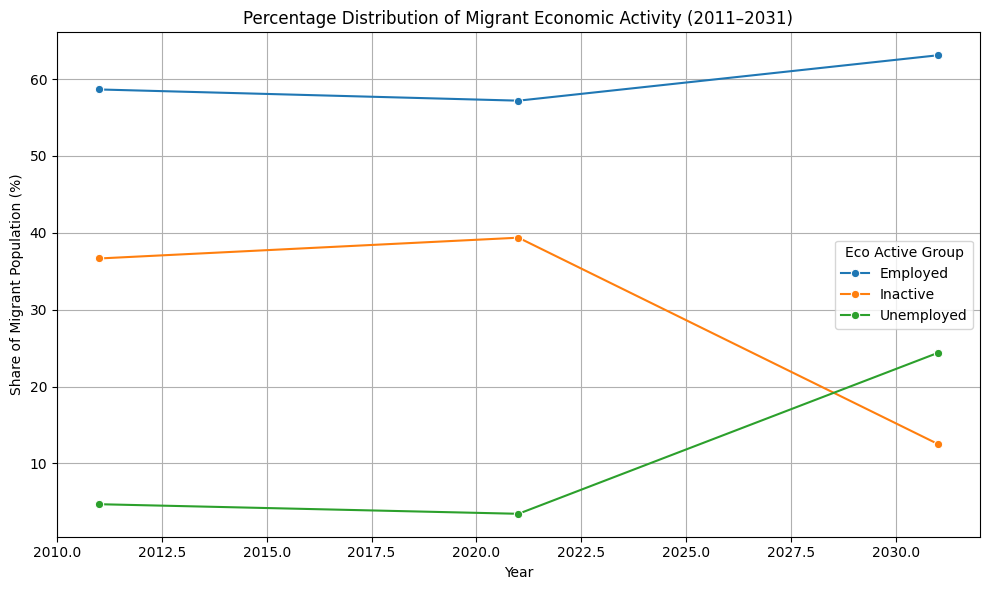

In [77]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_agg, x="Year", y="Percent", hue="Eco Active Group", marker='o')

plt.title("Percentage Distribution of Migrant Economic Activity (2011–2031)")
plt.ylabel("Share of Migrant Population (%)")
plt.grid(True)
plt.legend(title="Eco Active Group")
plt.tight_layout()
plt.show()

# Clustering

In [78]:
df = combined_df
features = ['Economic Activity', 'Country of Birth', 'Age Group', 'Year']
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(df[features])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Add PCA results to the dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(X_scaled)

# Add t-SNE results to the dataframe
df['tSNE1'] = tsne_result[:, 0]
df['tSNE2'] = tsne_result[:, 1]

df.to_csv('Data/migrant_activity_PCA_tSNE.csv', index=False)

print("File saved as 'migrant_activity_PCA_tSNE.csv'.")

/Users/amritamoyade/Library/Mobile Documents/com~apple~CloudDocs/Amrita_Moyade_Assignment/TB-2/Visual Analysis/coursework_env/lib/python3.13/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


File saved as 'migrant_activity_PCA_tSNE.csv'.


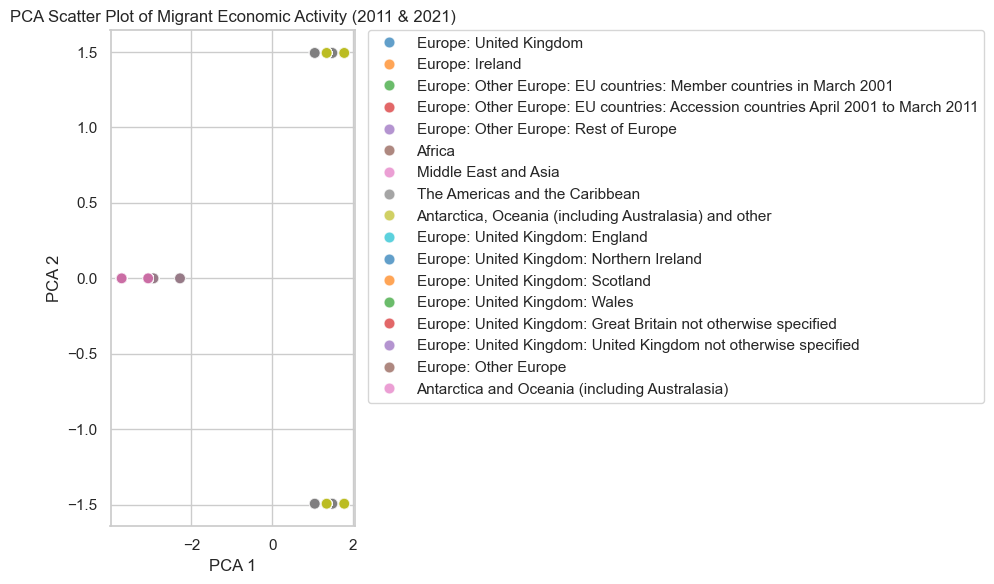

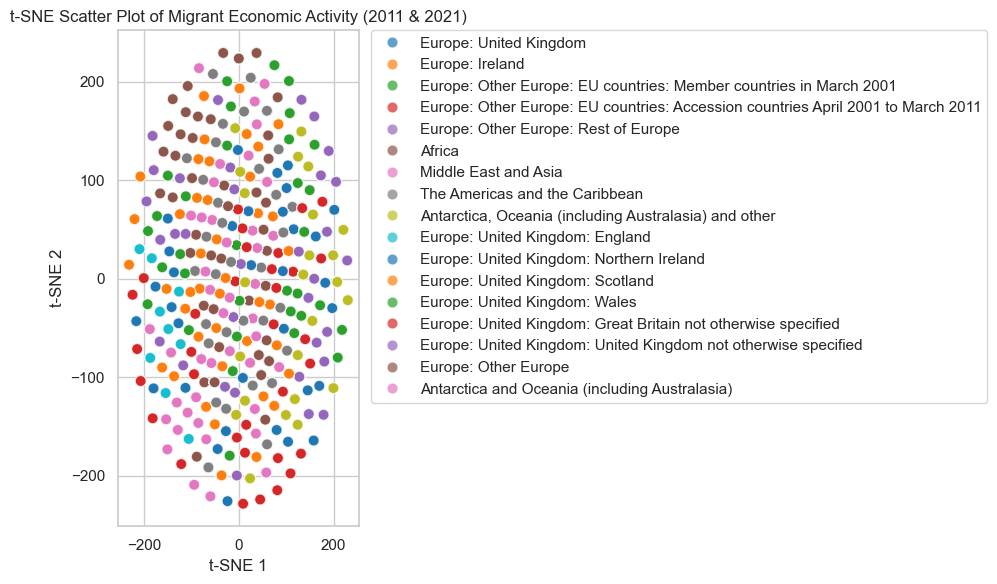

In [79]:
sns.set(style="whitegrid")

# Plot PCA Scatter
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Country of Birth', 
    data=df,
    palette='tab10',  # you can change color palettes
    alpha=0.7,
    s=60
)
plt.title('PCA Scatter Plot of Migrant Economic Activity (2011 & 2021)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # move legend outside
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()

#  Plot t-SNE Scatter
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='tSNE1', y='tSNE2',
    hue='Country of Birth',  
    data=df,
    palette='tab10',
    alpha=0.7,
    s=60
)
plt.title('t-SNE Scatter Plot of Migrant Economic Activity (2011 & 2021)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.tight_layout()
plt.show()